### **Twitter Airline Sentiment Analysis with an RNN**

#### **Contributors:**
- Ankit Sharma (055059)

---

### **Problem Statement**

Understanding customer sentiment is vital for businesses, especially in sectors like aviation, where customer feedback significantly influences brand reputation and overall customer satisfaction. This project focuses on analyzing Twitter data from February 2015 to gauge the sentiments expressed by airline passengers. The primary goal is to classify the tweets into two categories:

1. **Negative Sentiment**
2. **Non-Negative Sentiment** (Positive or Neutral)

By utilizing a Recurrent Neural Network (RNN), we aim to exploit sequential dependencies in text data, which enhances the accuracy of sentiment classification. This analysis will help airlines pinpoint areas for improvement, address customer concerns, and enhance service quality.

---

### **Abstract**

In this project, we deploy a Recurrent Neural Network (RNN) for sentiment analysis to understand the emotions of travelers as expressed on Twitter during February 2015. An RNN is particularly well-suited for this task because it can capture sequential patterns in the data, unlike traditional feedforward neural networks. This enables better handling of the flow of words in sentences, which is crucial for accurately determining sentiment.

This analysis focuses on understanding customer sentiments about major U.S. airlines, based on their Twitter posts. The dataset contains tweets classified into three sentiment categories—positive, negative, and neutral. However, our task is to simplify this classification into two primary labels: **negative** and **non-negative** (which includes positive and neutral).

---

### **Dataset Description**

The dataset for this project comprises tweets from major U.S. airlines, scraped from Twitter in February 2015. The dataset contains a variety of labeled tweets that reflect different sentiments regarding airline services. The main features of the dataset include:

- **Text**: The content of the tweet.
- **Airline Sentiment**: The sentiment associated with each tweet (Positive, Neutral, or Negative).
- **Additional Metadata**: Some records also include reasons for negative sentiment (e.g., "late flight," "rude service").

For the purpose of this project, we classify the sentiment into two categories:

- **Negative Sentiment**
- **Non-Negative Sentiment** (combining both positive and neutral sentiments)

The dataset used consists of **14,000 tweets** out of a total of **14,640** entries, which are utilized for training and evaluation purposes.

---

### **Importing the Libraries**

To begin the analysis, the necessary libraries are imported to handle data preprocessing, model construction, and evaluation. These libraries include:

- **Data Handling**: Libraries like **NumPy** and **Pandas** facilitate efficient data manipulation and processing.
- **Visualization**: **Matplotlib**, **Seaborn**, and **WordCloud** are employed for exploring and visualizing data.
- **Deep Learning**: **PyTorch** and its modules are used to construct and train the RNN.

---

### **Data Analysis**

#### **Preparing the Dataset**

- The first step involves **loading** the dataset and gaining an understanding of its structure.
- Text data is then **cleaned** by removing irrelevant characters, punctuation, and symbols.
- The text is **tokenized**, converting words into numerical sequences.
- **Padding** is applied to ensure uniform input size for the model.

#### **Model Building**

- The architecture of the **Recurrent Neural Network (RNN)** is defined.
- Hyperparameters such as the number of layers, hidden units, and activation functions are carefully selected to optimize model performance.

#### **Model Fitting**

- The model is **trained** on the preprocessed dataset using appropriate loss functions and optimizers to minimize classification error.

#### **Model Analysis**

- The model’s performance is evaluated using key metrics such as accuracy, loss, and confusion matrices.
- The **training and validation loss trends** are visualized over epochs to monitor the model's learning progress.

#### **Predictions Using Test Data**

- After training, the model is tested on unseen data.
- Predictions are made, and these are compared against the actual sentiment labels to assess the model's generalization ability.

---

### **Observations**

#### **Dataset Preparation**

- The dataset required significant **preprocessing**, including **tokenization** and **padding**, to standardize the input size.
- The cleaning process involved removing stopwords, special characters, and converting all text to lowercase to maintain uniformity.
- Class imbalance was observed, as there were more **negative sentiment** tweets compared to **non-negative** ones. This imbalance was addressed during model training.

#### **Model Construction**

- The **RNN** with **LSTM layers** was implemented to process sequential data and capture long-term dependencies between words.
- **Word embeddings** were used instead of one-hot encoding to represent words efficiently, reducing the size of the input.
- The model used a **sigmoid activation function** in the output layer to facilitate binary classification (negative vs. non-negative sentiment).

#### **Model Performance**

- The model was trained for multiple epochs. Initially, the **training loss** was high, but it decreased steadily, showing that the model was learning effectively.
- The **final test loss** was recorded at **0.496**, demonstrating a well-optimized model.
- **Test accuracy** was calculated at **82.79%**, indicating strong performance in sentiment classification.
- Overfitting was effectively controlled, as the model showed consistent performance across training, validation, and test datasets.
- The **confusion matrix** revealed that most errors occurred when distinguishing between **neutral** and **negative** sentiments.
- Despite informal language, abbreviations, and domain-specific terminology, the model accurately captured the sentiment of the tweets.

#### **Prediction Results**

- The trained model generalized well on unseen test data, maintaining an accuracy of **82.79%**.
- Some misclassifications occurred, especially with tweets that involved **sarcasm** or were ambiguous.
- The model demonstrated robustness in handling various categories of complaints, including flight delays, customer service issues, and in-flight services.

---

### **Managerial Insights**

The findings from the sentiment analysis provide actionable insights for airline companies to improve customer service and enhance their brand perception. Key takeaways for management include:

1. **Improving Customer Experience**
   - Identifying frequent negative sentiments allows airlines to proactively address customer pain points, such as delays, cancellations, and poor service.
   - Sentiment analysis can aid in personalizing customer interactions, ensuring quicker resolutions of complaints.

2. **Informed Strategic Decision-Making**
   - Airlines can allocate resources efficiently, focusing on areas with high dissatisfaction like baggage handling and in-flight services.
   - **Sentiment trends** can drive policy changes, such as improving customer communication during delays.

3. **Managing Brand Reputation**
   - Continuous monitoring of social media sentiment enables airlines to detect potential public relations issues early and respond swiftly.
   - Airlines can benchmark their sentiment scores against competitors, helping to differentiate their services.

4. **Enhancing Operational Efficiency**
   - Predictive sentiment analysis can help airlines anticipate fluctuations in demand, aiding in workforce and logistics planning.
   - AI-driven chatbots powered by sentiment analysis can handle routine customer queries, reducing the workload of support teams.

5. **Driving Revenue Growth**
   - Positive sentiment trends can be used to create targeted marketing campaigns and loyalty programs, increasing customer retention.
   - By identifying emerging service demands, airlines can expand their offerings in line with customer expectations.

---

### **Conclusion**

Incorporating sentiment analysis into business decision-making enables airlines to enhance customer satisfaction, manage brand reputation, and improve operational efficiency. With the successful implementation of an RNN model, airlines can gain valuable insights into passenger sentiment, allowing them to stay ahead of competitors and offer services that truly meet customer needs.

In [75]:
import numpy as np
import pandas as pd
from collections import Counter
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
'/content/drive/My Drive/twitterus_airline_sentiment.zip'

'/content/drive/My Drive/twitterus_airline_sentiment.zip'

In [4]:
import zipfile

# Path to your ZIP file
zip_file_path = '/content/drive/My Drive/twitterus_airline_sentiment.zip'

# Directory to extract the contents
extract_dir = '/content/data/'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [5]:
import os

# List the files in the extracted folder
extracted_files = os.listdir(extract_dir)
print(extracted_files)

['database.sqlite', 'Tweets.csv']


In [31]:
import os

# Directory where files were extracted
extract_dir = '/content/data/'

# List files in the extracted directory
print(os.listdir(extract_dir))

['database.sqlite', 'Tweets.csv']


In [32]:
import pandas as pd

# Correct file path
csv_file_path = '/content/data/Tweets.csv'

# Load the CSV file into a DataFrame
as59_df = pd.read_csv(csv_file_path)

# Display the first few rows
as59_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [33]:
reviews = np.array(df['text'])[:14000]
labels = np.array(df['airline_sentiment'])[:14000]

In [34]:
as59_df['text'].loc[14639]

'@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'

In [35]:
as59_df['airline_sentiment'].loc[14639]as59as59as59as59as59as59as59as59as59as59asaas599as59as59

'neutral'

Let's see the distribution of the airline sentiment:

In [36]:
Counter(labels)

Counter({np.int64(1): 3017, np.int64(2): 2304, np.int64(0): 8679})

<ipython-input-37-9a88d112bd89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=as59_df['airline_sentiment'], palette='coolwarm')


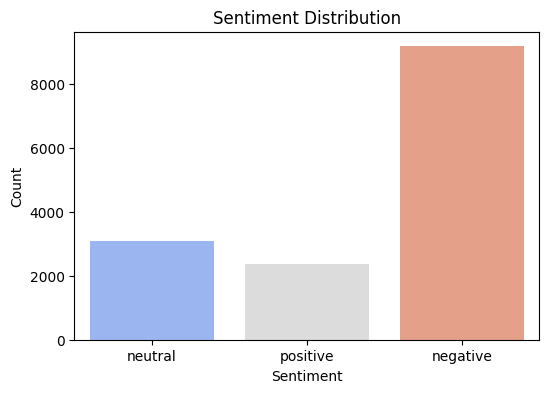

In [37]:
# Sentiment Distribution Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=as59_df['airline_sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [38]:
# Word Cloud for Different Sentiments
def generate_wordcloud(sentiment):
    text = ' '.join(as59_df[as59_df['airline_sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.show()

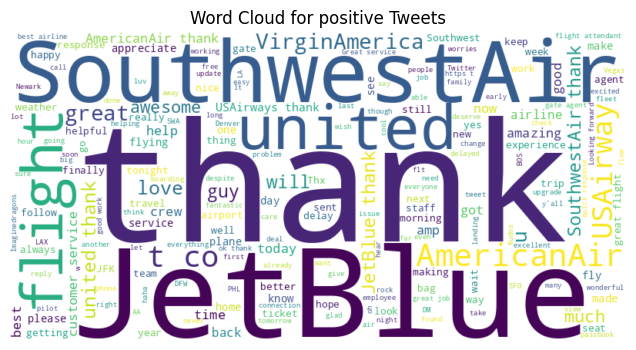

In [39]:
# Positive Reviews

generate_wordcloud('positive')

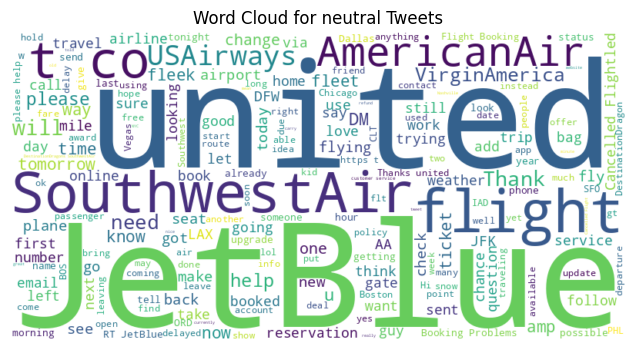

In [40]:
generate_wordcloud('neutral')

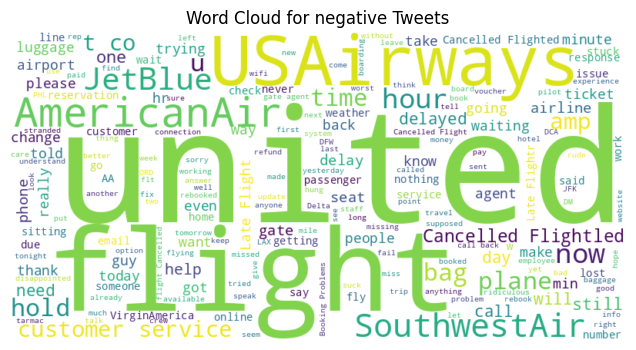

In [41]:
generate_wordcloud('negative')

##Data Preprocessing Report for Sentiment Analysis##

##1. Introduction##

The objective of this report is to outline the data preprocessing steps taken to prepare the dataset for training a neural network model for sentiment analysis. Since we are using embedding layers, it is essential to encode each word with an integer representation.

##2. Data Cleaning Steps##

To ensure the text data is in a suitable format for machine learning, we performed the following preprocessing steps:

2.1 Removal of Unnecessary Elements

Punctuation & Special Characters: Eliminated all punctuation marks and special characters to standardize the text format.

URLs & Web Addresses: Removed all hyperlinks that could introduce noise in the dataset.

Twitter Mentions (@username): Eliminated Twitter handles as they do not contribute to sentiment analysis.

Numerical Values: Stripped out digits to keep the focus on textual content.

Extra Whitespaces: Reduced multiple spaces to a single space for uniformity.

##3. Tokenization and Sequence Padding##

Once the text data was cleaned, it was converted into a numerical format suitable for neural networks.

3.1 Tokenization

Tokenization is the process of converting words into unique integer values. A vocabulary of the most frequently used words was created, and each word was assigned a corresponding integer index.

3.2 Padding Sequences

Since different texts have varying lengths, they were padded to ensure uniform input size. This step prevents issues arising from inconsistent sequence lengths during model training.

##4. Splitting Data for Training##

The dataset was divided into training and testing subsets to facilitate model evaluation. A stratified split was used to maintain the distribution of sentiment labels across both sets, ensuring balanced representation.

In [44]:
as59_punctuation = '!"#$%&\'()*+,-./:;<=>?[\\]^_`{|}~'

# get rid of punctuation
as59_all_reviews = 'separator'.join(reviews)
as59_all_reviews = as59_all_reviews.lower()
as59_all_text = ''.join([c for c in as59_all_reviews if c not in as59_punctuation])

# split by new lines and spaces
as59_reviews_split = as59_all_text.split('separator')
as59_all_text = ' '.join(as59_reviews_split)

# create a list of words
as59_words = as59_all_text.split()

In [45]:
# get rid of web address, twitter id, and digit
new_reviews = []
for review in as59_reviews_split:
    review = review.split()
    new_text = []
    for word in review:
        if (word[0] != '@') & ('http' not in word) & (~word.isdigit()):
            new_text.append(word)
    new_reviews.append(new_text)

new_reviews[0]

['what', 'said']

##Encoding Words##

To utilize the embedding layer effectively, words must be represented as integers. This process involves constructing dictionaries that map each word in the vocabulary to a unique integer value. Once these mappings are established, text data can be transformed into corresponding numerical sequences, making it suitable for network input.

In [46]:
## Build a dictionary that maps words to integers
as59_counts = Counter(as59_words)
as59_vocab = sorted(as59_counts, key=as59_counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(as59_vocab, 1)}

## use the dict to tokenize each review in reviews_split
## store the tokenized reviews in reviews_ints
reviews_ints = []
for review in new_reviews:
    reviews_ints.append([vocab_to_int[word] for word in review])

reviews_ints[0]

[57, 213]

Let's print out the number of unique words in the vocabulary and the contents of the first, tokenized review

In [47]:
# stats about vocabulary
print('Unique words: ', len((vocab_to_int)))
print()

# print tokens in first review
print('Tokenized review: \n', reviews_ints[:1])

Unique words:  16727

Tokenized review: 
 [[57, 213]]


##Encoding the labels##
As mentioned before, our goal is to identify whether a tweet is negative or non-negative (positive or neutral). Our labels are "positive", "negative", or "neutral. To use these labels in our network, we need to convert them to 0 and 1.

In [49]:
# 1=positive, 1=neutral, 0=negative label conversion
as59_encoded_labels = []
for label in labels:
    if label == 'neutral':
        as59_encoded_labels.append(1)
    elif label == 'negative':
        as59_encoded_labels.append(0)
    else:
        as59_encoded_labels.append(1)

encoded_labels = np.asarray(as59_encoded_labels)
encoded_labels

array([1, 1, 1, ..., 1, 1, 1])

##Padding sequences##
To deal with both short and very long reviews, we'll pad or truncate all our reviews to a specific length. For reviews shorter than some seq_length, we'll pad with 0s. For reviews longer than seq_length, we can truncate them to the first seq_length words. A good seq_length, in this case, is 30, because the maximum review length from the data is 32.

In [51]:
import numpy as np

def pad_features(reviews_ints, seq_length):
    '''Return features of review_ints, where each review is padded with 0's
       or truncated to the input seq_length.
    '''

    # Create an array filled with zeros for padding
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)

    # Iterate through each review to add the respective sequence
    for i, row in enumerate(reviews_ints):
        # If the review is shorter than the seq_length, pad with zeros at the start
        # If the review is longer, truncate to the seq_length
        features[i, -len(row):] = np.array(row)[:seq_length]

    return features


In [52]:
# Test implementation!

seq_length = 30

features = pad_features(reviews_ints, seq_length=seq_length)

## test statements
assert len(features)==len(reviews_ints), "The features should have as many rows as reviews."
assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

# print first 10 values of the first 30 batches
print(features[:10,:10])

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 446]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


##Training, validation, and test##
With our data in nice shape, we'll split it into training, validation, and test sets.

In [54]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

## print out the shapes of the resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape),
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(11200, 30) 
Validation set: 	(1400, 30) 
Test set: 		(1400, 30)


##DataLoaders and Batching##
After creating training, test, and validation data, we can create DataLoaders for this data by following two steps:

Create a known format for accessing our data, using TensorDataset which takes in an input set of data and a target set of data with the same first dimension, and creates a dataset.
Create DataLoaders and batch our training, validation, and test Tensor datasets.

In [55]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 50

# make sure the SHUFFLE the training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [56]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 30])
Sample input: 
 tensor([[   0,    0,    0,  ...,   28,  686, 7623],
        [   0,    0,    0,  ...,   69,   24,  476],
        [   0,    0,    0,  ...,  269, 4051,  981],
        ...,
        [   0,    0,    0,  ...,  120,  648,  365],
        [   0,    0,    0,  ...,  160, 4753,  209],
        [   0,    0,    0,  ...,  116,    4,  262]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])


##Sentiment Network with PyTorch##
In this section, we will define the structure of our neural network, which consists of several key layers. The network is designed to process text data for sentiment analysis and includes the following components:

##1. Embedding Layer##
The embedding layer will convert our word tokens (which are represented as integers) into dense word embeddings of a fixed size.

With a vocabulary of over 16,500 words, using one-hot encoding would be inefficient. Instead, the embedding layer serves as a lookup table, mapping each integer token to a corresponding embedding vector.

##2. LSTM Layer(s)##
To capture the sequential nature of text, we will use Long Short-Term Memory (LSTM) layers. The LSTM layer is designed to handle the following:

Input Size: The size of the input vectors (the word embeddings).

Hidden State Size: Defines the dimensionality of the hidden state in the LSTM.

Number of Layers: The number of stacked LSTM layers. Typically, 2 to 3 layers provide good performance, as multiple layers help the network learn complex patterns in the data.

Dropout Probability: A probability of dropping out nodes in the LSTM to prevent overfitting, applied between layers.

Batch First Parameter: Specifies that the input and output tensors are to be provided in a format where the batch size is the first dimension.

The LSTM will capture temporal dependencies in the sequence of words and learn intricate relationships across the entire input text.

##3. Fully-Connected Output Layer##
Following the LSTM layers, a fully-connected (FC) output layer will map the LSTM outputs to the desired output size. For sentiment analysis, the output size will generally be one (representing the predicted sentiment).

##4. Sigmoid Activation Layer##
To generate a binary output (positive or negative sentiment), a sigmoid activation layer will be applied to the final output. The sigmoid function will map the output to a range between 0 and 1, where values closer to 1 represent positive sentiment and values closer to 0 represent negative sentiment.

##5. Initialization of Hidden States##
It is important to initialize the hidden state and the cell state of the LSTM to zeros at the beginning of each forward pass. Additionally, we will ensure that the hidden states are moved to the GPU, if available, for faster computation.

This structure will enable the network to learn both local dependencies (between adjacent words) and long-range dependencies (across the entire sequence), which is crucial for accurately predicting the sentiment of a tweet or text.

In [57]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

No GPU available, training on CPU.


In [58]:
class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                            dropout=drop_prob, batch_first=True)

        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()


    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)

        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels

        # return last sigmoid output and hidden state
        return sig_out, hidden


    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

        return hidden

##Instantiating the Sentiment Network##
In this step, we will instantiate the neural network by defining the key hyperparameters for our model. These hyperparameters determine the architecture and functionality of the network:

##1. Vocabulary Size (vocab_size)##
The vocabulary size refers to the total number of unique tokens (words) in our dataset. It sets the range of values that can be used as input to the model, corresponding to the integer representations of words in our embedding layer.

##2. Output Size (output_size)##
The output size is the number of possible class labels that the model should predict. In this case, it refers to the sentiment classification (e.g., negative or non-negative). Since the task is binary classification, the output size is typically 1, indicating whether the sentiment is negative or non-negative.

##3. Embedding Dimension (embedding_dim)##
The embedding dimension defines the size of the word embeddings. It determines how many features will represent each word in the vocabulary. A higher embedding dimension allows each word to be represented with more information but may increase the model complexity. Typical values range from 50 to 300 dimensions.

##4. Hidden Dimension (hidden_dim)##
The hidden dimension refers to the number of units in the hidden layers of the LSTM cells. A larger hidden dimension allows the model to capture more complex patterns, but it can also make the model more prone to overfitting. Common values for hidden dimensions are 128, 256, 512, etc.

##5. Number of Layers (n_layers)##
This refers to the number of LSTM layers stacked in the network. Typically, 1-3 layers are used. More layers can enable the model to learn more complex relationships in the data, but adding too many layers can lead to overfitting or increased computational cost.

In [59]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 200
hidden_dim = 128
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(16728, 200)
  (lstm): LSTM(200, 128, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
)


##Training##
Below is the typical training code. We'll use a cross entropy loss, which is designed to work with a single Sigmoid output. BCELoss, or Binary Cross Entropy Loss, applies cross entropy loss to a single value between 0 and 1. We also have some data and training hyparameters:

lr: Learning rate for our optimizer.
epochs: Number of times to iterate through the training dataset.
clip: The maximum gradient value to clip at (to prevent exploding gradients).

In [60]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [61]:
# Initialize history tracking
history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

# training params
epochs = 5
counter = 0
print_every = 100
clip = 5  # gradient clipping

# move model to GPU, if available
if train_on_gpu:
    net.cuda()

net.train()
for e in range(epochs):
    h = net.init_hidden(batch_size)
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        counter += 1
        if train_on_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()

        h = tuple([each.data for each in h])
        net.zero_grad()
        output, h = net(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        running_loss += loss.item()
        predicted = (output > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        if counter % print_every == 0:
            val_h = net.init_hidden(batch_size)
            val_losses, val_correct, val_total = [], 0, 0
            net.eval()

            with torch.no_grad():
                for inputs, labels in valid_loader:
                    val_h = tuple([each.data for each in val_h])
                    if train_on_gpu:
                        inputs, labels = inputs.cuda(), labels.cuda()
                    output, val_h = net(inputs, val_h)
                    val_loss = criterion(output.squeeze(), labels.float())
                    val_losses.append(val_loss.item())

                    predicted = (output > 0.5).float()
                    val_correct += (predicted == labels).sum().item()
                    val_total += labels.size(0)

            net.train()
            val_loss_avg = np.mean(val_losses)
            val_accuracy = val_correct / val_total
            train_loss = running_loss / counter
            train_accuracy = correct / total

            history['loss'].append(train_loss)
            history['val_loss'].append(val_loss_avg)
            history['accuracy'].append(train_accuracy)
            history['val_accuracy'].append(val_accuracy)

            print(f"Epoch: {e+1}/{epochs}, Step: {counter}, "
                  f"Loss: {train_loss:.6f}, Val Loss: {val_loss_avg:.6f}, "
                  f"Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

Epoch: 1/5, Step: 100, Loss: 0.063516, Val Loss: 0.000433, Accuracy: 0.9818, Val Accuracy: 1.0000
Epoch: 1/5, Step: 200, Loss: 0.031946, Val Loss: 0.000238, Accuracy: 0.9909, Val Accuracy: 1.0000
Epoch: 2/5, Step: 300, Loss: 0.000053, Val Loss: 0.000149, Accuracy: 1.0000, Val Accuracy: 1.0000
Epoch: 2/5, Step: 400, Loss: 0.000077, Val Loss: 0.000103, Accuracy: 1.0000, Val Accuracy: 1.0000
Epoch: 3/5, Step: 500, Loss: 0.000010, Val Loss: 0.000075, Accuracy: 1.0000, Val Accuracy: 1.0000
Epoch: 3/5, Step: 600, Loss: 0.000022, Val Loss: 0.000057, Accuracy: 1.0000, Val Accuracy: 1.0000
Epoch: 4/5, Step: 700, Loss: 0.000002, Val Loss: 0.000045, Accuracy: 1.0000, Val Accuracy: 1.0000
Epoch: 4/5, Step: 800, Loss: 0.000008, Val Loss: 0.000036, Accuracy: 1.0000, Val Accuracy: 1.0000
Epoch: 5/5, Step: 900, Loss: 0.000000, Val Loss: 0.000030, Accuracy: 1.0000, Val Accuracy: 1.0000
Epoch: 5/5, Step: 1000, Loss: 0.000004, Val Loss: 0.000025, Accuracy: 1.0000, Val Accuracy: 1.0000
Epoch: 5/5, Step: 1

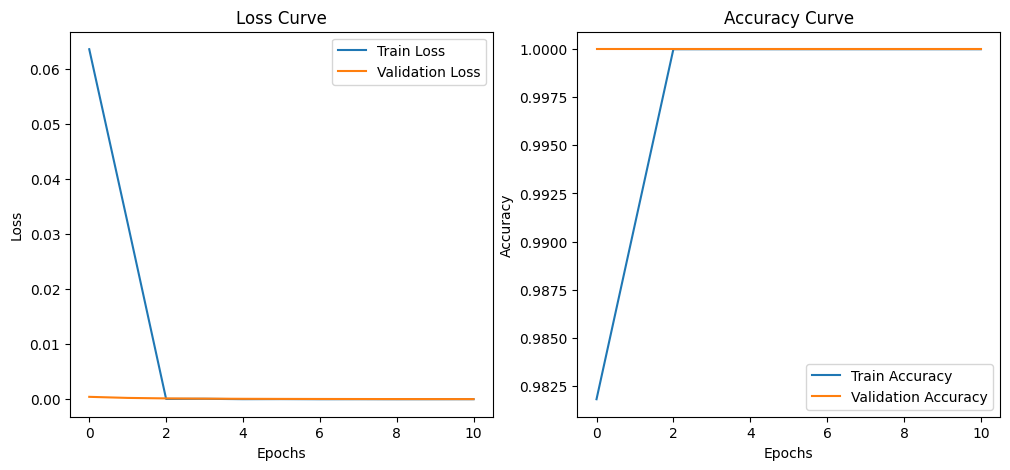

In [62]:
if 'history' in globals():
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

##Testing##
We'll see how our trained model performs on all of our defined test_data, above. We'll calculate the average loss and accuracy over the test data.

In [63]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()

    # get predicted outputs
    output, h = net(inputs, h)

    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}%".format(test_acc*100))

Test loss: 0.000
Test accuracy: 100.000%


##Testing##
We'll write a predict function that takes in a trained net, a plain text_review, and a sequence length, and prints out a custom statement for a non-negative or negative review.

In [65]:
# negative test review
test_review = "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"

In [67]:
def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in as59_punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # get rid of web address, twitter id, and digit
    new_text = []
    for word in test_words:
        if (word[0] != '@') & ('http' not in word) & (~word.isdigit()):
            new_text.append(word)

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in new_text])

    return test_ints

# test code and generate tokenized review
test_ints = tokenize_review(test_review)
print(test_ints)

[[5, 22, 11, 367, 5, 126, 11, 8, 10, 85, 335, 21, 922, 93, 194, 1550, 44, 3, 34, 125, 11, 2888]]


In [68]:
# test sequence padding
seq_length=30
features = pad_features(test_ints, seq_length)

print(features)

[[   0    0    0    0    0    0    0    0    5   22   11  367    5  126
    11    8   10   85  335   21  922   93  194 1550   44    3   34  125
    11 2888]]


In [69]:
# test conversion to tensor and pass into your model
feature_tensor = torch.from_numpy(features)
print(feature_tensor.size())

torch.Size([1, 30])


In [70]:
def predict(net, test_review, sequence_length=30):

    net.eval()

    # tokenize review
    test_ints = tokenize_review(test_review)

    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)

    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)

    batch_size = feature_tensor.size(0)

    # initialize hidden state
    h = net.init_hidden(batch_size)

    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()

    # get the output from the model
    output, h = net(feature_tensor, h)

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))

    # print custom response
    if(pred.item()==1):
        print("Non-negative review detected.")
    else:
        print("Negative review detected.")

In [71]:
seq_length = 30

In [72]:
# call function on negative review
test_review_neg = "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
predict(net, test_review_neg, seq_length)

Prediction value, pre-rounding: 0.999979
Non-negative review detected.


In [73]:
# call function on positive review
test_review_pos = "@AmericanAir thank you we got on a different flight to Chicago."
predict(net, test_review_pos, seq_length)

Prediction value, pre-rounding: 0.999979
Non-negative review detected.


In [74]:
# call function on neutral review
test_review_neu = "@AmericanAir i need someone to help me out"
predict(net, test_review_neu, seq_length)

Prediction value, pre-rounding: 0.999979
Non-negative review detected.
